## IAAF tablice

_Projekt pri predmetu Programiranje 1_

S spletne strani https://www.iaaf.org/records/all-time-toplists/middlelong/5000-metres/outdoor/women/senior sem zajela podatke o najboljših rezultatih žensk na 5000m med letoma 2001 in 2017. 
Podatki obsegajo: rank, ki ga je zasedla tekmovalka v tistem letu, datum teka, ime in priimek, datum rojstva, prizorišče teka in narodnost tekmovalke. 


Te rezultate bom tekom naloge analizirala.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates 
import matplotlib
#ker analiza obsega delo s časi, naložimo še paketa za pretvarjanje nizov v časovne objekte
import datetime 
import time

%matplotlib inline

tablice= pd.read_csv('lists.csv', encoding = "utf-8")

#datume spremenimo v pravo obliko, da lahko kasneje dostopamo do njih
#kjer daum rojstva ni popoln ga spremenimo v None
#(tako ali tako nimajo vsi razulati datuma rojstva, tako da to ne bo vplivalo na točnost analize)
tablice['DOB'] = pd.to_datetime(tablice['DOB'], format="%d %b %Y",  errors='coerce')
tablice['date'] = pd.to_datetime(tablice['date'], format="%d %b %Y")

pd.options.display.max_rows = 20

Za lažjo predstavo najprej poglejmo, kako sploh izgledajo tablice.

In [2]:
tablice.sort_values('time').head(10)

,rank,time,date,name,position,DOB,venue,nationality
3059,1,14:11.15,2008-06-06,Tirunesh DIBABA,1,1985-06-01,Oslo (NOR),ETH
15471,1,14:12.59,2016-06-02,Almaz AYANA,1,1991-11-21,Roma (ITA),ETH
3060,2,14:12.88,2008-07-22,Meseret DEFAR,1,1983-11-19,Stockholm (SWE),ETH
13496,1,14:14.32,2015-05-17,Almaz AYANA,1,1991-11-21,Shanghai (CHN),ETH
13497,2,14:15.41,2015-07-04,Genzebe DIBABA,1,1991-02-08,Paris (FRA),ETH
2571,1,14:16.63,2007-06-15,Meseret DEFAR,1,1983-11-19,Oslo (NOR),ETH
17458,1,14:18.37,2017-06-08,Hellen OBIRI,1,1989-12-13,Roma (ITA),KEN
6192,1,14:20.87,2011-07-29,Vivian Jepkemoi CHERUIYOT,1,1983-09-11,Stockholm (SWE),KEN
2572,2,14:22.51,2007-06-15,Vivian Jepkemoi CHERUIYOT,2,1983-09-11,Oslo (NOR),KEN
9725,1,14:23.68,2013-07-06,Tirunesh DIBABA,1,1985-06-01,Paris (FRA),ETH



Najhitrejši čas je trenutno veljaven svetovni rekord.

In [3]:
casi = tablice['time'].value_counts()
casi[:10]

16:09.00    10
15:56.00     9
17:18.63     8
17:19.08     8
16:19.58     8
17:18.07     8
16:03.80     8
17:24.34     8
16:46.20     7
16:33.49     7
Name: time, dtype: int64

Malo za šalo, malo zares, med vsemi časi se je največkrat zgodilo, da se je ura ustavila na natanko 16:09. 

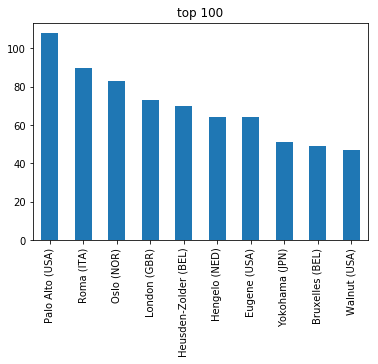

In [4]:
deseterica = tablice[tablice['rank'] <= 10]
stoterica = tablice[tablice['rank'] <= 100]

plt.figure()
stoterica['venue'].value_counts()[:10].plot(kind='bar', title = "top 100")

plt.show()

Najboljše uvrstitve atletinje dosegajo na stadionu Palo Alto v USA, veliko dobrih rezultatov, je bilo doseženih tudi v Rimu in Oslu. Torej, če se želite na lesticah uvrstiti med stoterico najboljših na 5000m je zmagovalni recept tek na enem od zgornjih stadionov.

In [5]:
tablice[tablice['nationality']=='SLO']

,rank,time,date,name,position,DOB,venue,nationality
63,64,15:23.46,2001-07-22,Helena JAVORNIK,13,1966-03-26,London (GBR),SLO
449,78,15:32.90,2002-06-23,Helena JAVORNIK,3,1966-03-26,Sevilla (ESP),SLO
909,110,15:36.81,2003-06-01,Helena JAVORNIK,7,1966-03-26,Hengelo (NED),SLO
5184,1312,17:13.78,2010-06-20,Lucija KRKOC,11,1988-04-09,Budapest (HUN),SLO
8594,1504,17:13.83,2012-07-07,Žana JEREB,1,1989-12-25,Koper (SLO),SLO
11438,802,16:35.89,2013-06-23,Maruša MIŠMAŠ,4,1994-10-24,Kaunas (LTU),SLO
12675,139,15:40.41,2014-06-22,Sonja ROMAN,4,1979-03-11,Tallinn (EST),SLO
17849,1191,16:51.80,2017-06-25,Sonja ROMAN,5,1979-03-11,Tel Aviv (ISR),SLO
18800,2043,17:26.13,2017-07-01,Laura GUZELJ BLATNIK,1,1997-08-28,Slovenj Gradec (SLO),SLO
19547,843,16:32.81,2017-09-09,Maruša MIŠMAŠ,1,1994-10-24,Nova Gorica (SLO),SLO


Kljub majhnosti Slovenije, so se tudi slovenske atletinje v zadnjih 18 letih znašle med najboljšimi, kot najboljšo slovensko dolgoprogašico bi veljalo izpostaviti Heleno Javornik. 

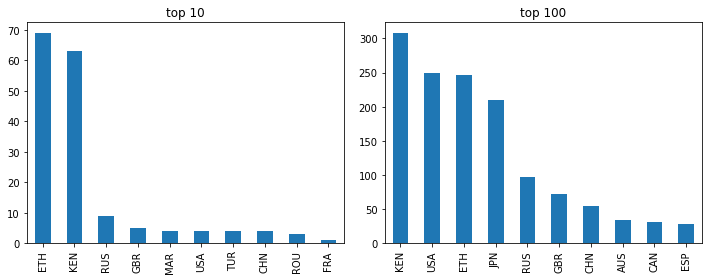

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(121)
deseterica['nationality'].value_counts()[:10].plot(kind='bar', title = "top 10" )
plt.subplot(122)
stoterica['nationality'].value_counts()[:10].plot(kind='bar', title = "top 100" )

plt.tight_layout()

Zanimivo je, da so se med deseterico najboljših največkrat uvrstile etiopijske tekačice, medtem ko so se v stoterici največkrat znašle Kenijke. Komu bi torej lahko pripisali zmago v etiopijsko-kenijski tekaški vojni?

Prav tako je presenetljiv podatek, da se američanke med deseterico uvrstijo dokaj redko, medetem ko se med 100 najboljšimi atletinjami znajdejo veliko bolj pogosto.

In [7]:
#trik, da čase pretvorimo v sekunde 
df = pd.DataFrame({'cas' : pd.to_datetime(tablice['time'], format="%M:%S.%f"), 'razlika': datetime.datetime(1900,1,1,0,0,0)})

df['sekunde'] = df['cas'] - df['razlika']
df['sekunde'] = df['sekunde'].dt.total_seconds().astype(float)

tablice['sekunde'] = df['sekunde']
povprecje = tablice.groupby('nationality')['sekunde'].mean()

povprecje['pov'] = pd.to_datetime(povprecje, unit='s').dt.time
povprecje['pov'].sort_values().head(20)

nationality
ETH    00:15:20.448306
UAE    00:15:41.830909
BRN    00:15:42.198864
TAN    00:15:47.446087
ZAM    00:15:47.580000
KEN    00:15:57.505663
JPN    00:16:05.343172
AZE    00:16:06.511000
RUS    00:16:06.890161
ALB    00:16:06.940000
ALG    00:16:07.530526
ERI    00:16:10.995313
TUR    00:16:13.215570
SRB    00:16:13.838649
MAR    00:16:14.917290
POR    00:16:16.200464
MDA    00:16:16.333750
MAW    00:16:17.460000
CHN    00:16:18.019001
PLE    00:16:18.340000
Name: sekunde, dtype: object

Analiza časov pove, da so etiopijke med najhitrejšimi, tako je pošteno reči, da so Etiopijske tekačice najboljuspešne. 

In [8]:
#trik, da sekunde pretvorimo v čase

j = df['sekunde'].mean()
str(datetime.timedelta(seconds=j))

'0:16:28.222802'

Vidimo torej, da povprečen čas vseh zajetih rezultatov na 5000m znaša 16:28.223s.

(Opomba: Zgornja meja vseh zajetih reulatov je čas pod 17:30.00)

In [9]:
povprecje = tablice.groupby('rank')['sekunde'].mean()

povprecje['pov'] = pd.to_datetime(povprecje, unit='s').dt.time
povprecje['pov'].head(20)

rank
1     00:14:24.201176
2     00:14:27.855294
3     00:14:31.775882
4     00:14:34.707059
5     00:14:36.271667
6     00:14:38.770625
7     00:14:39.791765
8     00:14:41.945294
9     00:14:43.830588
10    00:14:45.031176
11    00:14:46.495556
12    00:14:48.190625
13    00:14:48.845882
14    00:14:51.012353
15    00:14:52.127059
16    00:14:53.159412
17    00:14:54.732941
18    00:14:56.152941
19    00:14:56.841176
20    00:14:57.974706
Name: sekunde, dtype: object

Zanimivo je videti, kako se povprečni čas spreminja glede na rank, ki ga je zasedla tekmovalka. Bistveno pa je, da mora tekmovalka v povprečju teči pod 15min, da se uvrsti med dvajsetrico najboljših.

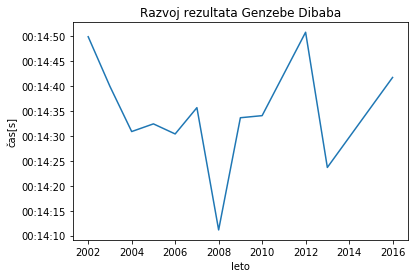

In [10]:
#poglejmo si razvoj rezultata aktualne svetovn prvakinje
rekorderka = tablice[tablice['name'] =='Tirunesh DIBABA']
datum = rekorderka['date']
leto = datum.dt.year
y = rekorderka['time']
time_format = '%M:%S.%f'
time = [datetime.datetime.strptime(i, time_format) for i in y]
plt.title('Razvoj rezultata Genzebe Dibaba')
plt.xlabel('leto')
plt.ylabel('čas[s]')
plt.plot_date(leto, time, fmt = '-', xdate=False, ydate=True)
plt.show()


Iz grafa lahko razberemo, kako se je spreminjal rezultat aktualne svetovne prvakinje skozi leta.

In [11]:
#najmlajša in najstarejša atletinja
from dateutil.relativedelta import relativedelta

tek = tablice['date']
rojstvo = tablice['DOB']
razlika = tek - rojstvo
starostmin = relativedelta(tablice.iloc[razlika.idxmin()]['date'],tablice.iloc[razlika.idxmin()]['DOB'])
starostmax = relativedelta(tablice.iloc[razlika.idxmax()]['date'],tablice.iloc[razlika.idxmax()]['DOB'])

(tablice.iloc[razlika.idxmin()][['name','time']], starostmin, 
 tablice.iloc[razlika.idxmax()][['name','time']], starostmax)


(name    Katherine PAGANO
 time            17:15.50
 Name: 5203, dtype: object,
 relativedelta(years=+12, months=+11),
 name    Mackenzie CALDWELL
 time              16:27.96
 Name: 15341, dtype: object,
 relativedelta(years=+128, months=+10, days=+28))

Najmlajša atletinja, ki se je uspela uvrstiti na lestvico najbolših je Katherine Pagano. To ji je uspelo pri slabih trinajstih letih z odličnim rezultatom 17:15.50!

Pri najstarejši atletinji pa gre očitno za napačen vnos rojstnega dne.

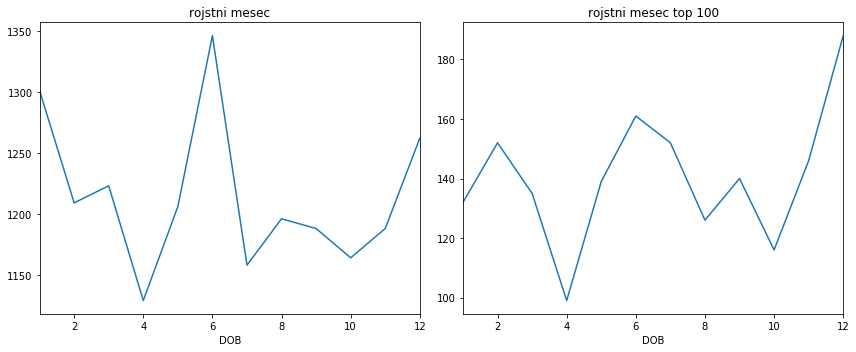

In [12]:
#rezultati glede na mesec rojstva

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.xlabel('mesec rojstva')
tablice.DOB.dt.month.groupby(tablice.DOB.dt.month).size().plot(title = "rojstni mesec" )
plt.subplot(122)
plt.xlabel('mesec rojstva')
stoterica.DOB.dt.month.groupby(stoterica.DOB.dt.month).size().plot(title = "rojstni mesec top 100")

plt.tight_layout()

Kljub temu, da pri obeh grafih prihaja do odstopanj je mogoče opaziti nekakšen trend v številu atletinj rojenih določenega meseca. Videti je, da atletinje rojene aprila niso med najbolj uspešnimi, medtem ko imate precej večjo vrjetnost,da boste uspešni v atletiki če ste rojeni junija ali pa decembra. 

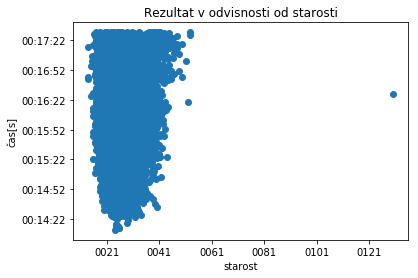

0        10748.0
1         9760.0
2        10119.0
3         9558.0
4         8604.0
5        12523.0
6         9373.0
7         9123.0
8         9083.0
9         9046.0
          ...   
19594        NaN
19595     8989.0
19596     7342.0
19597     7656.0
19598     7039.0
19599        NaN
19600        NaN
19601    11481.0
19602     8264.0
19603        NaN
Length: 19604, dtype: float64 0        14:29.32
1        14:31.69
2        14:32.44
3        14:39.22
4        14:40.47
5        14:45.86
6        14:46.92
7        14:48.97
8        14:49.32
9        14:51.58
           ...   
19594    16:36.08
19595    16:36.12
19596    16:36.30
19597    16:36.33
19598    16:36.36
19599    16:36.36
19600    16:36.40
19601    16:36.41
19602    16:36.46
19603    16:36.46
Name: time, Length: 19604, dtype: object


In [13]:
#starost v odvisnosti rezultata
starost = (tablice['date'] - tablice['DOB'])
starost = starost.apply(lambda x: x.days)
y = tablice['time']
time_format = '%M:%S.%f'
time = [datetime.datetime.strptime(i, time_format) for i in y]
plt.title('Rezultat v odvisnosti od starosti')
plt.xlabel('starost')
plt.ylabel('čas[s]')
plt.plot_date(starost, time, marker="o")
plt.show()
print(starost,y)